In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ML libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create folders to save outputs
os.makedirs("outputs/plots", exist_ok=True)
os.makedirs("outputs/results", exist_ok=True)
os.makedirs("outputs/images", exist_ok=True)

print("✅ Environment setup complete")


✅ Environment setup complete


In [4]:
digits = load_digits()

X = digits.data
y = digits.target

print("Feature shape:", X.shape)
print("Label shape:", y.shape)
print("Unique labels:", np.unique(y))


Feature shape: (1797, 64)
Label shape: (1797,)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


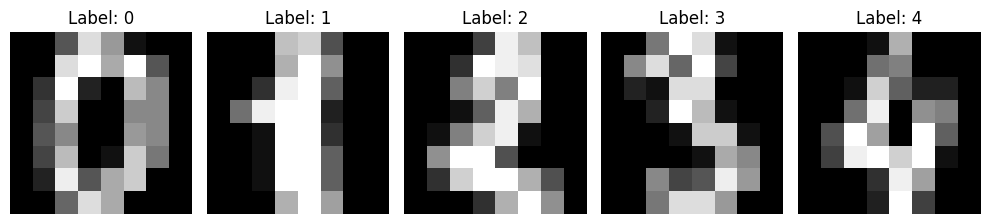

In [6]:
plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("outputs/images/sample_digits.png")
plt.show()


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 1347
Testing samples: 450


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling applied")


✅ Feature scaling applied


In [12]:
k_values = [3, 5, 7, 9]
accuracy_scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[k] = acc
    print(f"K={k} → Accuracy={acc:.4f}")


K=3 → Accuracy=0.9667
K=5 → Accuracy=0.9644
K=7 → Accuracy=0.9644
K=9 → Accuracy=0.9644


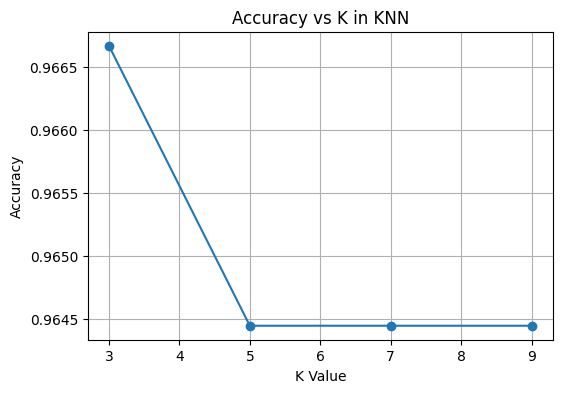

In [14]:
plt.figure(figsize=(6,4))
plt.plot(accuracy_scores.keys(), accuracy_scores.values(), marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K in KNN")
plt.grid()

plt.savefig("outputs/plots/accuracy_vs_k.png")
plt.show()


In [16]:
best_k = max(accuracy_scores, key=accuracy_scores.get)
print("Best K:", best_k)

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

y_final_pred = final_knn.predict(X_test_scaled)


Best K: 3


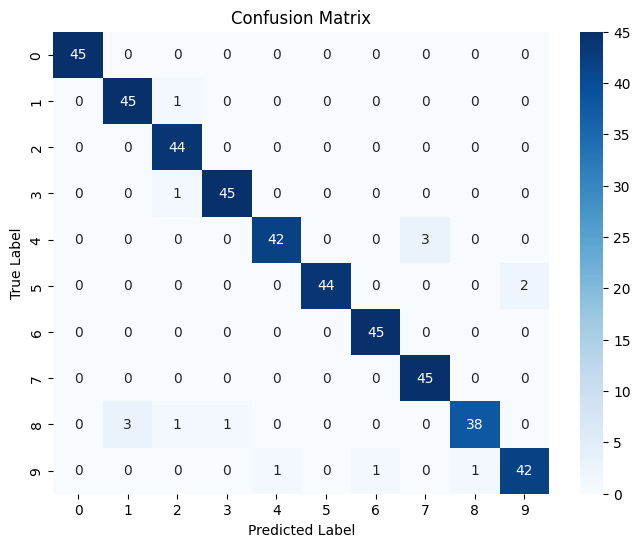

In [18]:
cm = confusion_matrix(y_test, y_final_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.savefig("outputs/plots/confusion_matrix.png")
plt.show()


In [20]:
report = classification_report(y_test, y_final_pred)

with open("outputs/results/classification_report.txt", "w") as f:
    f.write(report)

print("✅ Classification report saved")


✅ Classification report saved


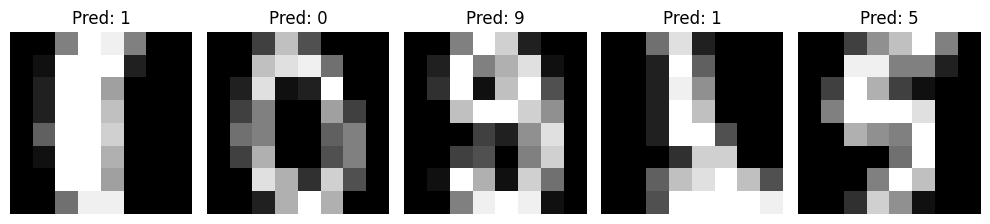

In [21]:
plt.figure(figsize=(10,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), cmap='gray')
    plt.title(f"Pred: {y_final_pred[i]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("outputs/images/final_predictions.png")
plt.show()
